#**마트 수요/매출 예측**
---
> **목차(Context)**

* 프로젝트 Summary
* 문제상황 Introduction
* 🔈Process01
* 🔉Process02
* 🔊Process03

## **프로젝트 Summary**
---

> **프로젝트명**

```
▶ 마트 수요/매출 예측
```  

> **프로젝트유형**

```
▶ 데이터 EDA 및 Regression(회귀) 예측
```

> **학습목표**

```
▶ 데이터를 Read하고 전처리할 수 있는 역량 습득
▶ Regression(회귀) 예측 문제에 대한 개념 이해
▶ Regression(회귀) 예측 모델링 프로세스 및 코드 이해
```

## **문제상황 Introduction**
---
> **시나리오** 🧮🔍

```
A마트는 주52시간제에 운영으로 인하여 인력난을 겪고 있다. 주 당 판매량을 예측할 수 없기 때문에 근무 스케줄과 인력 운영을 효율적으로  
하기 힘든 상황이다. 대기업 마트가 아니기 때문에 방문자 수, 주차 대수 등 세세한 데이터를 수집할 수 없는 상황이다.
효율적인 인력 운영을 위해서 공공 데이터와 쉽게 구할 수 있는 데이터를 활용하여 주간 마트 판매량 예측을 통해 인력운영을 효율화 하고자 한다.
```  

> **문제정의**

```
▶ 인력운영 비효율로 인한 운영 비용 상승
```  

> **기대효과**

```
▶ 인력운영 효율화로 인한 운영 비용 절감
```

> **해결방안**

```
▶ 주간 판매량 예측을 통해 인력 운영 스케줄 조정
```

> **성과측정**  

```
▶ 주간 판매량 예측량에 따른 스케줄 조정 후 운영 비용 모니터링
```

> **운영**  

```
▶ 1주가 종료되면 차주 판매량을 예측하기 위한 공공데이터 및 내부 데이터 수집
▶ Data를 Model에 Input후 주간 판매량 추출
▶ 주간 판매량에 따라 인력 운영 계획 수립
```

> **데이터 살펴보기**

* 마케팅 캠페인 관련 데이터
* 데이터 명세 ⬇

|Store|Date|Weekly_Sales|Holiday_Flag|Temperature|Fuel_Price|CPI|Unemployment|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|상점ID|날짜|주간판매량|공휴일여부|온도|연료가격|소비자물가지수|실업률|


In [4]:
# ▶ Warnings 제거
import warnings
warnings.filterwarnings('ignore')

# ▶ Google drive mount or 폴더 클릭 후 구글드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# ▶ 경로 설정
import os
os.chdir('/content/drive/MyDrive/파이썬 데이터분석/개인 프로젝트/마트 수요 예측')
os.getcwd()

'/content/drive/MyDrive/파이썬 데이터분석/개인 프로젝트/마트 수요 예측'

In [6]:
# data read
import pandas as pd
df = pd.read_csv('MART_DATA.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


## **🔈Process01**  
**┗ 판매 추이 분석**  
---

### · Data 전처리  
---
* 수집된 데이터의 기본 정보들을 확인  

  (1) Data shape(형태) 확인

  (2) Data type 확인

  (3) Null값 확인 (※ 빈 값의 Data)

  (4) Outlier 확인 (※ 정상적인 범주를 벗어난 Data)  

In [7]:
# 데이터 형태 확인
print('df',df.shape)

df (6435, 8)


In [8]:
# data type check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [9]:
#null값 확인
print(df.isnull().sum())
# null이 없음 완벽~!

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


In [10]:
#outlier확인
df.describe()

# Temperature max값이 100이 넘는걸 보아 섭씨가 아닌 화씨로 기록된 데이터

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [11]:
# 화씨 > 섭씨 변환
df['Temperature'] = (df['Temperature']-32) / 1.8
df.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,5.727778,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,3.616667,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,4.405556,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,8.127778,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,8.055556,2.625,211.350143,8.106


In [12]:
df['Temperature'].describe()
#max값 이상 없음!

count    6435.000000
mean       15.924324
std        10.247185
min       -18.922222
25%         8.588889
50%        17.038889
75%        23.855556
max        37.855556
Name: Temperature, dtype: float64

In [13]:
# date 데이터가 object로 되어있어서 type변환시켜줌
import datetime
df['Date'] = pd.to_datetime(df['Date'])

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


### · 판매 추이 분석
---


In [149]:
# 총 45 store
len(df['Store'].unique())

45

In [150]:
df.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,5.73,2.57,211.10,8.11
1,1,2010-12-02,1641957.44,1,3.62,2.55,211.24,8.11
2,1,2010-02-19,1611968.17,0,4.41,2.51,211.29,8.11
3,1,2010-02-26,1409727.59,0,8.13,2.56,211.32,8.11
4,1,2010-05-03,1554806.68,0,8.06,2.62,211.35,8.11


In [151]:
df = df.sort_values(by=['Date'])
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
606,5,2010-01-10,283178.12,0,21.72,2.60,212.23,6.77
2036,15,2010-01-10,566945.95,0,15.38,2.84,132.76,8.07
5897,42,2010-01-10,481523.93,0,30.01,3.00,126.23,9.00
4610,33,2010-01-10,224294.39,0,33.03,3.00,126.23,9.27
5039,36,2010-01-10,422169.47,0,23.70,2.57,210.44,8.48


In [152]:
df['Date'].min() , df['Date'].max()
#2010-01-10 00:00:00 부터 2012-12-10 00:00:00까지의 데이터 확인

(Timestamp('2010-01-10 00:00:00'), Timestamp('2012-12-10 00:00:00'))

In [153]:
df['Store'].nunique()

45

In [54]:
# 1번 store df
df12 = df[df['Store'] == 12].sort_values(by=['Date'])
df12.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1607,12,2010-01-10,850936.26,0,29.56,3.00,126.23,14.31
1581,12,2010-02-04,1011822.30,0,15.47,3.09,126.60,14.10
1594,12,2010-02-07,951957.31,0,33.32,3.10,126.14,14.18
1575,12,2010-02-19,1095421.65,0,12.68,2.92,126.53,13.97
1576,12,2010-02-26,1048617.17,0,10.13,2.83,126.55,13.97
1603,12,2010-03-09,1075758.55,0,28.40,3.09,126.10,14.18
1616,12,2010-03-12,1069533.17,0,6.29,3.04,126.73,14.31
1579,12,2010-03-19,972088.34,0,15.32,3.05,126.61,13.97
1580,12,2010-03-26,981615.81,0,15.59,3.08,126.61,13.97
1590,12,2010-04-06,1049357.36,0,27.44,2.94,126.14,14.10


In [443]:
# 1번 store df
df5 = df[df['Store'] == 5].sort_values(by=['Date'])
df5.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Cluster,Dayofweek,month
606,5,2010-01-10,283178.12,0,21.72,2.60,212.23,6.77,3,6,1
580,5,2010-02-04,331406.00,0,17.32,2.72,211.37,6.46,3,3,2
593,5,2010-02-07,305993.27,0,27.36,2.67,211.78,6.50,3,6,2
574,5,2010-02-19,303447.57,0,5.08,2.51,211.85,6.57,3,4,2
575,5,2010-02-26,270281.63,0,8.17,2.56,211.88,6.57,3,4,2
602,5,2010-03-09,323798.00,0,28.92,2.58,212.09,6.50,3,1,3
615,5,2010-03-12,344490.88,0,10.73,2.71,212.16,6.77,3,4,3
578,5,2010-03-19,281706.41,0,13.03,2.72,211.77,6.57,3,4,3
579,5,2010-03-26,273282.97,0,11.37,2.73,211.57,6.57,3,4,3
589,5,2010-04-06,337825.89,0,26.41,2.71,211.73,6.46,3,1,4


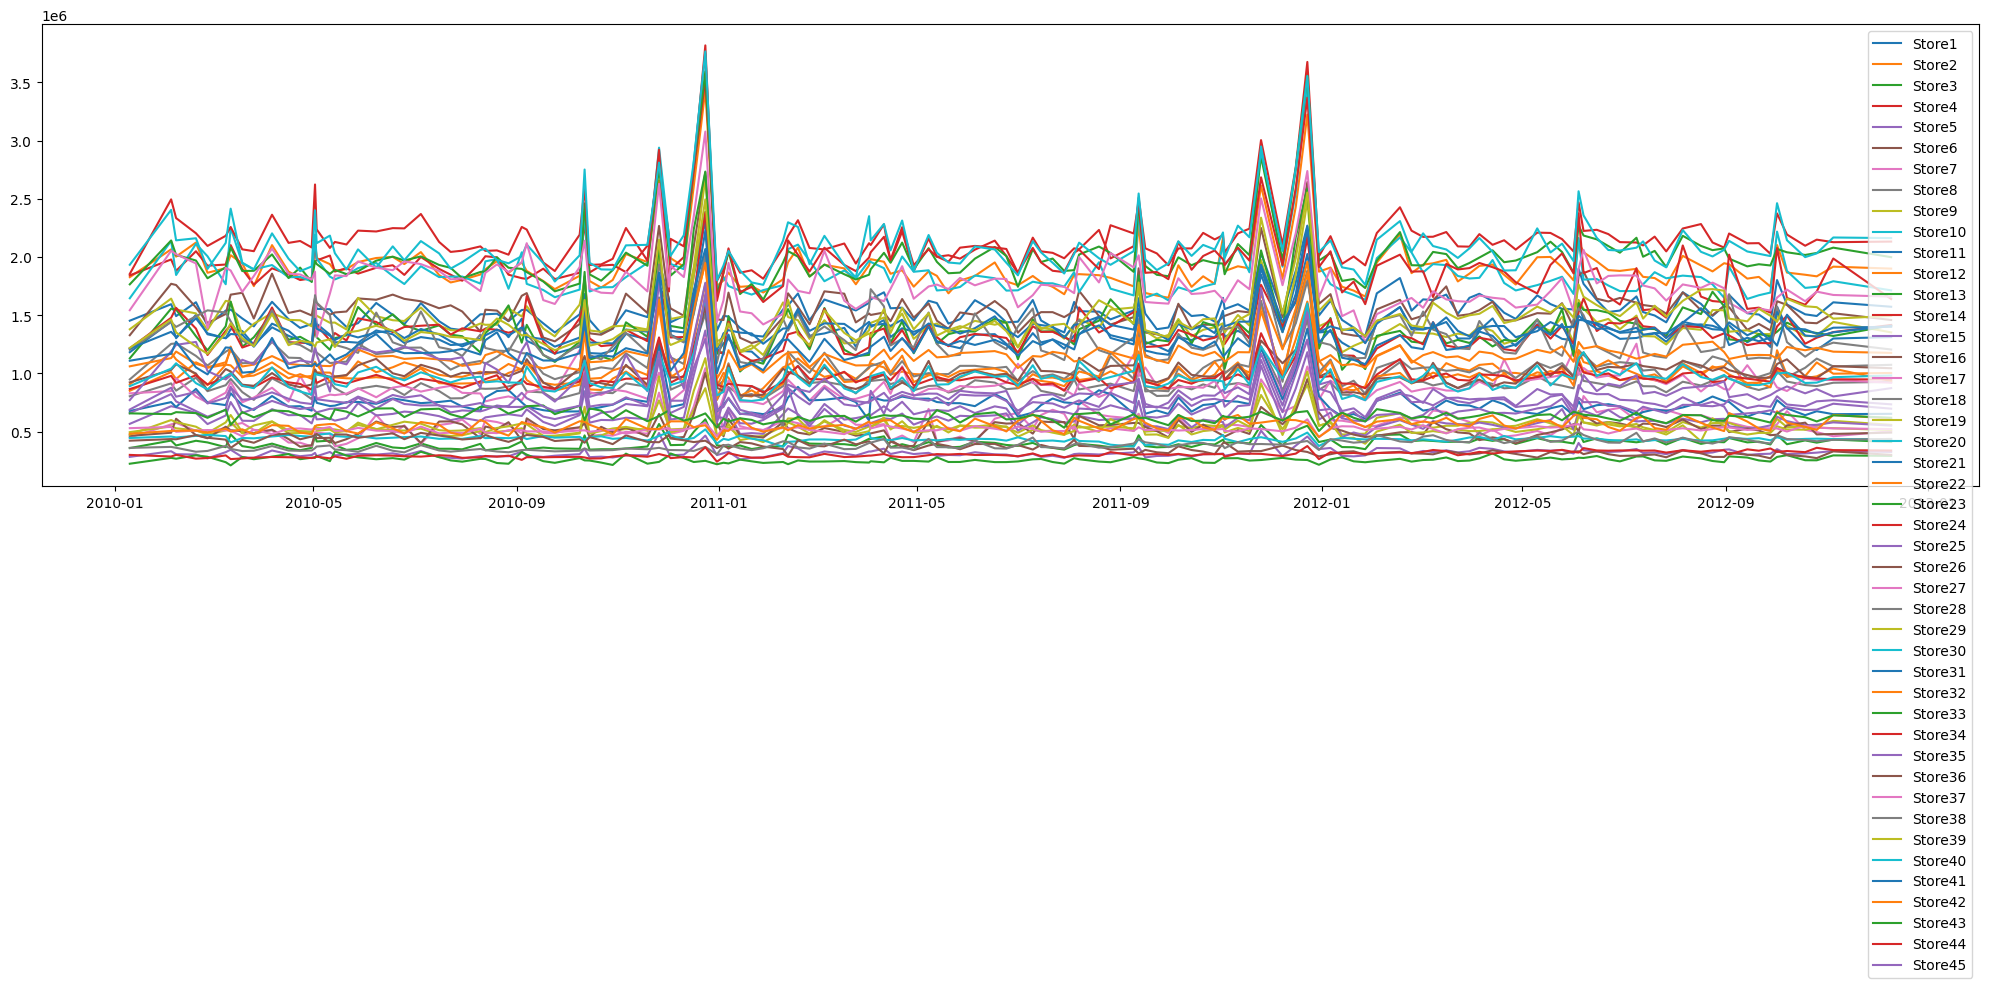

In [155]:
# 데이터 시각화를 위한 라이브러리 통계적 그래픽을 그리기 위한 고수준 인터페이스 제공
import seaborn as sns
import matplotlib.pyplot as plt

# Jupyter 노트북에서 사용되는 매직 커맨드
%matplotlib inline
#plt.style.use(['light_background'])

# 전체 매장에 대한 시각화
for store_num in range(1,46):
    #매장 데이터 선택

    df_store = df[df['Store'] == store_num].sort_values(by = ['Date'])
    #플롯 생성
    plt.plot(df_store['Date'],df_store['Weekly_Sales'], label = f'Store{store_num}')

#플롯 설절
plt.gcf().set_size_inches(25,6)
plt.legend()
plt.show()


스토어별로 주간 판매랑이 천차만별이라 각 주간 판매량 수준에 맞는 독립적인 모델 필요

In [156]:
# 판매량 수준 비교
import pandas as pd
# 빈 데이터 프레임 생성
df_concat = pd.DataFrame()

# 1번 스토어부터 45번 스토어까지 반복
for store_num in range(1,46):
    df_store = df[df['Store']== store_num ].sort_values(by=['Date'])
    #매장 데이터를 새로운 열로 추가
    df_concat[f'Store{store_num}_sales'] = df_store['Weekly_Sales'].reset_index(drop=True)

#Date열 추가
df_concat['Date'] = df_store['Date'].reset_index(drop=True)

df_concat

,Store1_sales,Store2_sales,Store3_sales,Store4_sales,Store5_sales,Store6_sales,Store7_sales,Store8_sales,Store9_sales,Store10_sales,...,Store37_sales,Store38_sales,Store39_sales,Store40_sales,Store41_sales,Store42_sales,Store43_sales,Store44_sales,Store45_sales,Date
0,1453329.50,1827440.43,358784.10,1842821.02,283178.12,1328468.89,448998.73,804105.49,495692.19,1645892.97,...,529877.93,360256.58,1219583.91,891152.33,1109216.35,481523.93,657108.77,300152.45,690007.76,2010-01-10
1,1594968.28,2066187.72,423294.40,1979247.12,331406.00,1770333.90,561145.14,914500.91,545206.32,2138651.97,...,540189.70,368929.55,1463942.62,1041202.13,1168826.39,505907.41,650102.80,286197.50,877235.96,2010-02-04
2,1492418.14,2003940.64,381151.72,1881337.21,305993.27,1759777.25,575570.77,852333.75,528832.54,1845893.87,...,498292.53,361181.48,1352547.70,1087578.78,1273279.79,507168.80,667353.79,300628.19,800147.84,2010-02-07
3,1611968.17,2124451.54,421642.19,2049860.26,303447.57,1567138.07,506760.54,963960.37,511327.90,2113432.58,...,510382.50,327237.92,1230591.97,916289.20,1052034.74,508794.87,658997.55,267956.30,841264.04,2010-02-19
4,1409727.59,1865097.27,407204.86,1925728.84,270281.63,1432953.21,496083.24,847592.11,473773.27,2006774.96,...,513615.82,334222.73,1168582.02,863917.41,991941.73,491510.58,618702.79,273079.07,741891.65,2010-02-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,1592409.97,1866719.96,391811.60,2193367.69,306759.70,1588380.73,675926.30,930745.69,538713.47,1880436.94,...,500964.59,436690.13,1641867.92,1007906.43,1504545.94,576620.31,643558.78,333594.81,733037.32,2012-10-08
139,1508068.77,1847990.41,424513.08,2097266.85,313358.15,1436883.99,516424.83,900309.75,542009.46,1734834.82,...,551969.10,428806.46,1577486.33,918170.50,1326197.24,541406.98,623919.23,323766.77,718125.53,2012-10-19
140,1493659.74,1834458.35,405432.70,2149594.46,319550.77,1431426.34,495543.28,891671.44,549731.49,1744349.05,...,534738.43,417290.38,1569502.00,921264.52,1316542.59,514756.08,587603.55,361067.07,760281.43,2012-10-26
141,1611096.05,1917520.99,431985.36,2127661.17,333870.52,1517075.67,460397.41,920128.89,592572.30,1792345.30,...,527983.04,429914.60,1470792.41,967729.35,1353285.10,643603.69,640159.04,341381.08,770487.37,2012-11-05


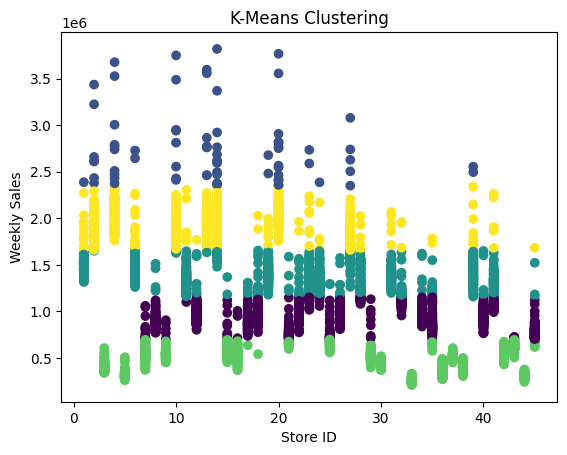

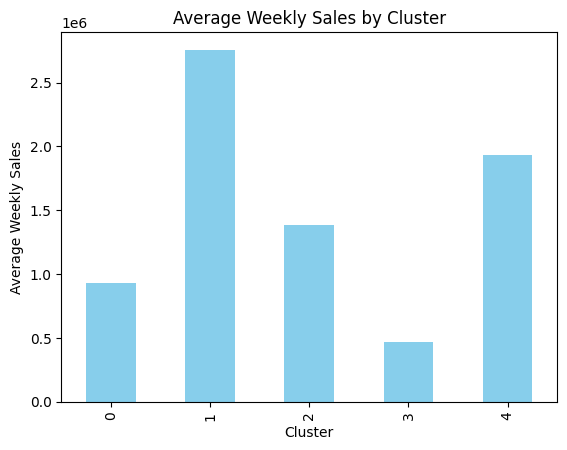

Silhouette Score: 0.6019390261159185


In [157]:
# K-Means 클러스터링을 통해 그룹화 진행 후 분석하려고 함
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 주간 판매량을 기준으로 클러스터링을 수행하기 위해 필요한 열 선택
features_for_clustering = ['Weekly_Sales']

# 데이터 표준화 (Standardization)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[features_for_clustering])

kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# 클러스터별 평균 판매량 확인
cluster_means = df.groupby('Cluster')['Weekly_Sales'].mean()

# 시각화
plt.scatter(df['Store'], df['Weekly_Sales'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Store ID')
plt.ylabel('Weekly Sales')
plt.title('K-Means Clustering')
plt.show()

# 클러스터별 평균 판매량 시각화
cluster_means.plot(kind='bar', color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Average Weekly Sales')
plt.title('Average Weekly Sales by Cluster')
plt.show()

from sklearn.metrics import silhouette_score

silhouette_score_value = silhouette_score(scaled_data, df['Cluster'])
print(f"Silhouette Score: {silhouette_score_value}")

클러스터를 5로 설정했을때 실루엣 스코어 점수가 가장 높다.


In [158]:
# 클러스터별로 데이터 그룹화
cluster_groups = df.groupby('Cluster')

# 각 클러스터에 해당하는 데이터프레임을 저장할 변수
cluster_dataframes = {}


# 각 클러스터에 대한 데이터프레임을 변수에 저장
for cluster, cluster_df in cluster_groups:
    cluster_dataframes[f'cluster_{cluster}'] = cluster_df.copy()

# 각 클러스터에 해당하는 데이터프레임에 접근
for cluster_name, cluster_df in cluster_dataframes.items():
    print(f"{cluster_name} DataFrame:")
    print(cluster_df)
    print("\n")

cluster0_df = cluster_dataframes['cluster_0']
cluster1_df = cluster_dataframes['cluster_1']
cluster2_df = cluster_dataframes['cluster_2']
cluster3_df = cluster_dataframes['cluster_3']
cluster4_df = cluster_dataframes['cluster_4']


cluster_0 DataFrame:
      Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
5611     40 2010-01-10     891152.33             0        16.67        2.72   
4896     35 2010-01-10     771065.21             0        21.22        2.71   
1035      8 2010-01-10     804105.49             0        20.39        2.60   
2465     18 2010-01-10     948977.50             0        19.87        2.72   
4467     32 2010-01-10    1061089.56             0        18.97        2.76   
...     ...        ...           ...           ...          ...         ...   
2571     18 2012-12-10    1074079.00             0        10.54        4.03   
1141      8 2012-12-10     927511.99             0        12.79        3.60   
3715     26 2012-12-10    1044639.69             0         7.33        4.03   
4859     34 2012-12-10     948613.39             0        15.52        3.60   
3143     22 2012-12-10    1004039.84             0        12.32        4.03   

        CPI  Unemployment  Clu

In [159]:
print('culster0_df : ',cluster0_df['Store'].nunique())
print('culster1_df : ',cluster1_df['Store'].nunique())
print('culster2_df : ',cluster2_df['Store'].nunique())
print('culster3_df : ',cluster3_df['Store'].nunique())
print('culster4_df : ',cluster4_df['Store'].nunique())

culster0_df :  24
culster1_df :  13
culster2_df :  29
culster3_df :  21
culster4_df :  23


## **🔉Process02**  
**┗ 클러스터별 매출 영향도 분석**  
---


### · line plot - 상관관계 분석
---

In [160]:
cluster2_df.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Cluster
34,1,2010-01-10,1453329.50,0,22.16,2.60,211.67,7.84,2
3895,28,2010-01-10,1203080.41,0,29.56,3.00,126.23,14.31,2
1321,10,2010-01-10,1645892.97,0,30.01,3.00,126.23,9.00,2
3323,24,2010-01-10,1215273.20,0,19.38,2.84,132.76,8.28,2
4324,31,2010-01-10,1213981.64,0,21.27,2.60,211.33,8.16,2


In [161]:
# ▶ Holiday
cluster3_df.groupby('Holiday_Flag')['Weekly_Sales'].mean()

Holiday_Flag
0   469061.70
1   479747.07
Name: Weekly_Sales, dtype: float64

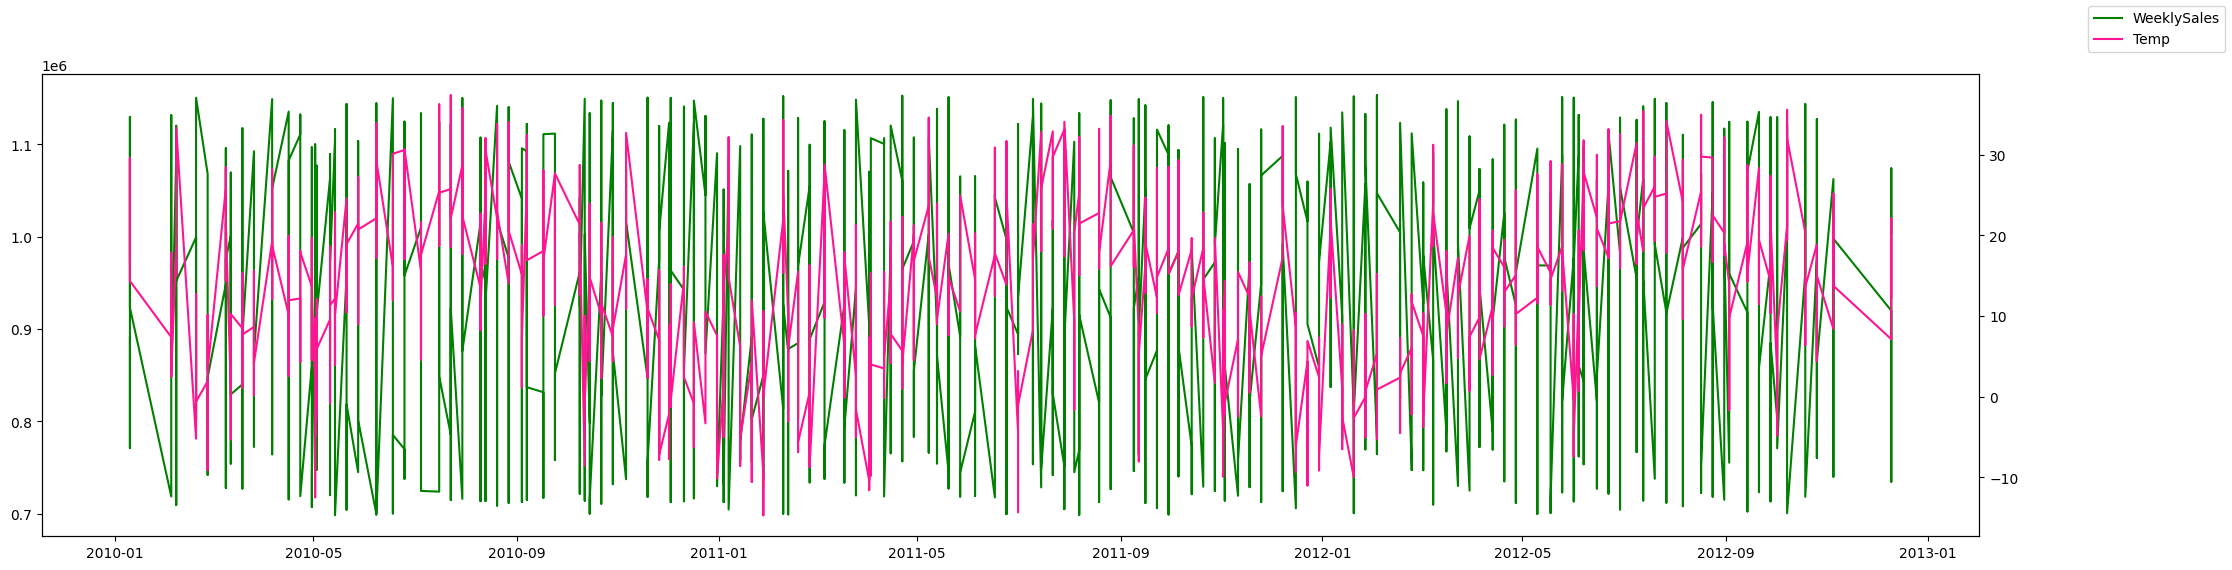

In [162]:
# ▶ 온도와 주간 판매량, 온도가 올라가면 판매량이 적어지고 온도가 낮아지면 판매량이 증가하는 약소한 경향
fig, ax1 = plt.subplots()
ax1.plot(cluster0_df['Date'], cluster0_df['Weekly_Sales'], color='green', label='WeeklySales')

ax2 = ax1.twinx()
ax2.plot(cluster0_df['Date'], cluster0_df['Temperature'], color='deeppink', label='Temp')

plt.gcf().set_size_inches(25, 6)
fig.legend()
plt.show()


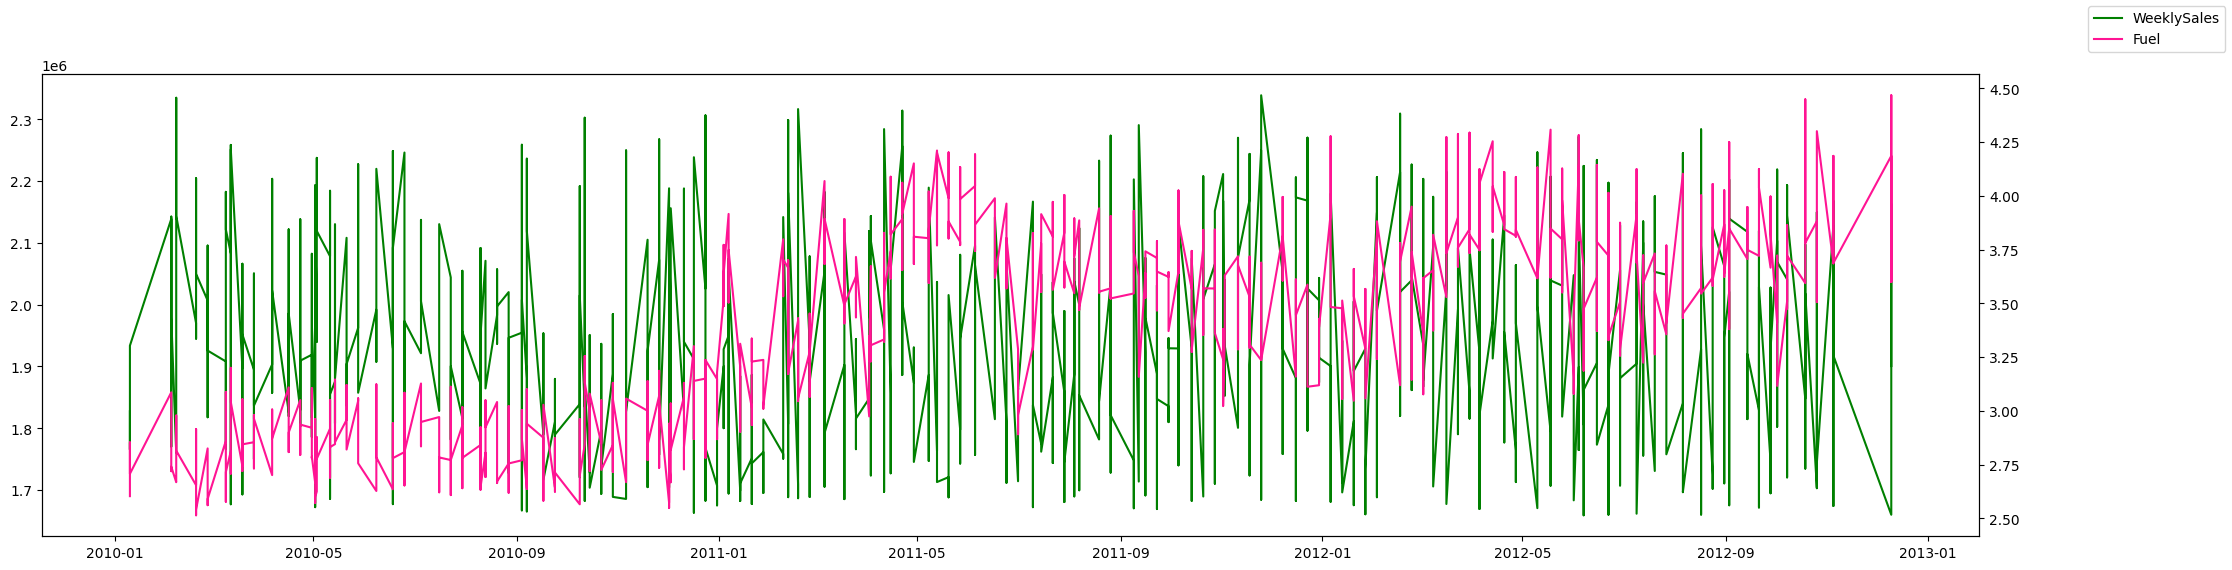

In [163]:
# ▶ 연료 가격과 주간 판매량
fig, ax1 = plt.subplots()
ax1.plot(cluster4_df['Date'], cluster4_df['Weekly_Sales'], color='green', label= 'WeeklySales')

ax2 = ax1.twinx()
ax2.plot(cluster4_df['Date'], cluster4_df['Fuel_Price'], color='deeppink', label='Fuel')

plt.gcf().set_size_inches(25, 6)
fig.legend()
plt.show()

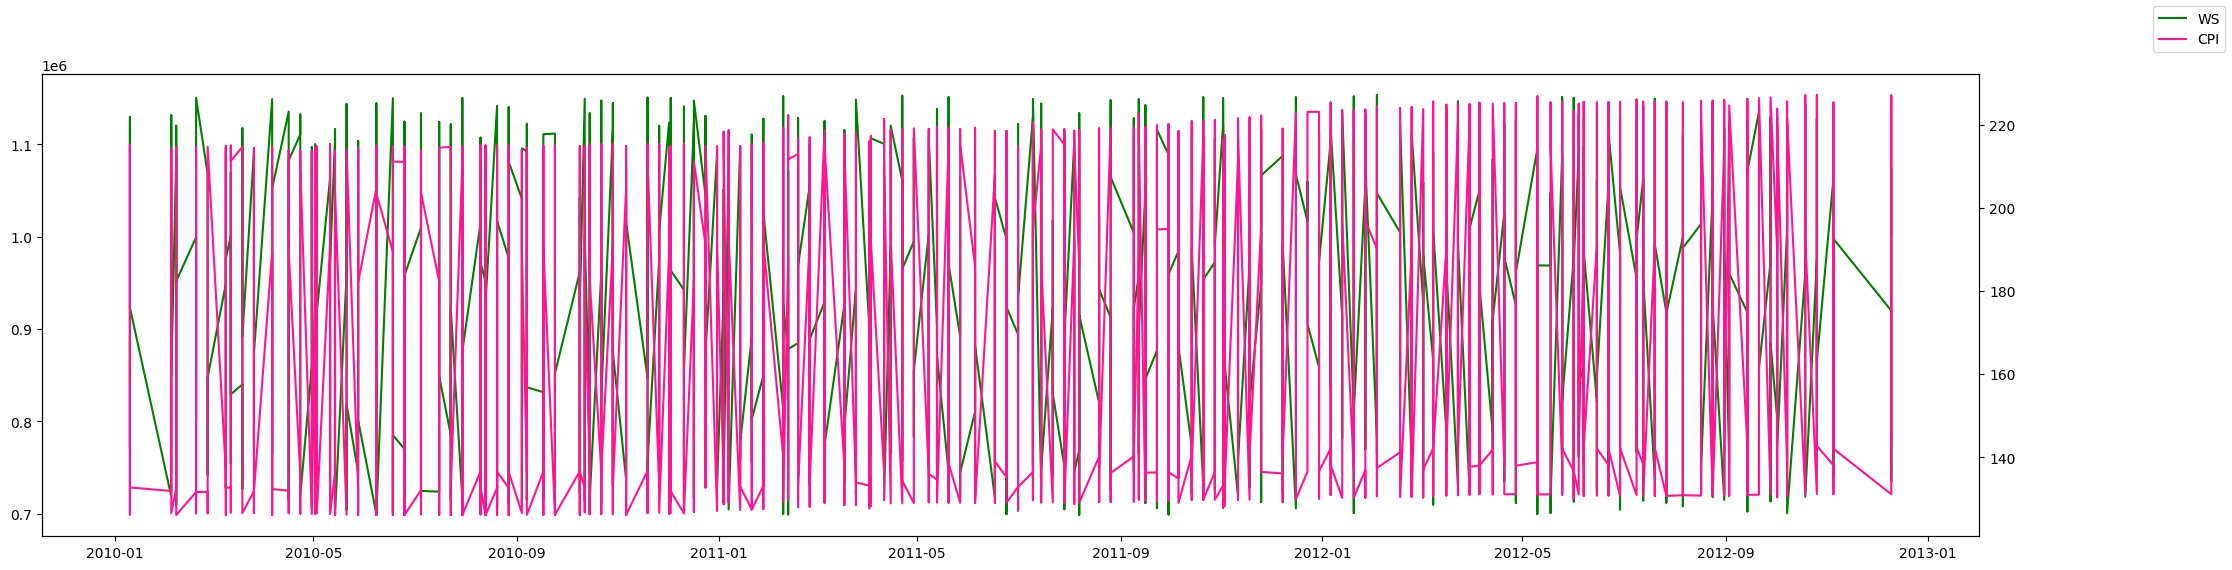

In [164]:
# ▶ CPI와 주간 판매량
fig, ax1 = plt.subplots()
ax1.plot(cluster0_df['Date'], cluster0_df['Weekly_Sales'], color='green', label='WS')

ax2 = ax1.twinx()
ax2.plot(cluster0_df['Date'], cluster0_df['CPI'], color='deeppink', label='CPI')

plt.gcf().set_size_inches(25, 6)
fig.legend()
plt.show()

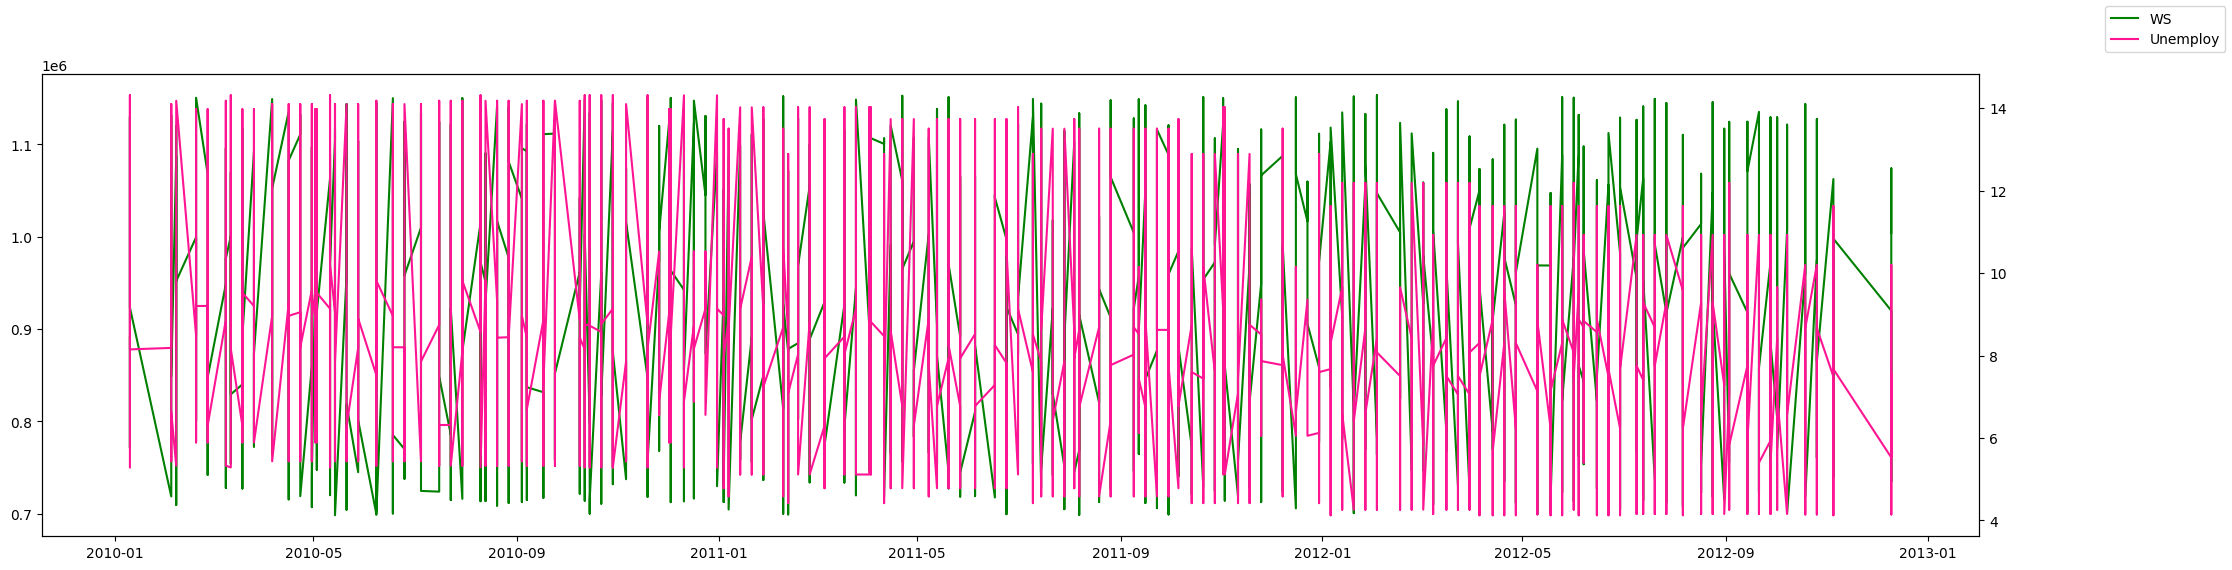

In [165]:
# ▶ 실업률과 주간 판매량
fig, ax1 = plt.subplots()
ax1.plot(cluster0_df['Date'], cluster0_df['Weekly_Sales'], color='green', label='WS')

ax2 = ax1.twinx()
ax2.plot(cluster0_df['Date'], cluster0_df['Unemployment'], color='deeppink',label='Unemploy')

plt.gcf().set_size_inches(25, 6)
fig.legend()
plt.show()

### · heat map - 상관관계 분석
---

In [166]:
cluster0_df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Cluster
5611,40,2010-01-10,891152.33,0,16.67,2.72,132.76,5.29,0
4896,35,2010-01-10,771065.21,0,21.22,2.71,136.63,8.76,0
1035,8,2010-01-10,804105.49,0,20.39,2.60,215.03,6.43,0
2465,18,2010-01-10,948977.50,0,19.87,2.72,132.76,9.33,0
4467,32,2010-01-10,1061089.56,0,18.97,2.76,190.67,9.14,0


In [167]:
df_corr = cluster0_df.drop(['Store', 'Holiday_Flag', 'Date'], axis=1)
df_corr.corr()

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Cluster
Weekly_Sales,1.00,-0.11,0.04,-0.36,0.15,NaN
Temperature,-0.11,1.00,0.17,0.14,0.25,NaN
Fuel_Price,0.04,0.17,1.00,-0.14,0.00,NaN
CPI,-0.36,0.14,-0.14,1.00,-0.28,NaN
Unemployment,0.15,0.25,0.00,-0.28,1.00,NaN
Cluster,NaN,NaN,NaN,NaN,NaN,NaN


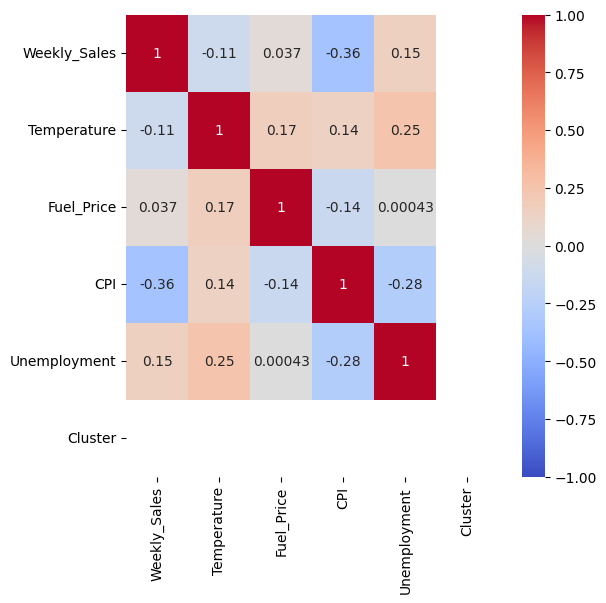

In [168]:
# ▶ 연속형 변수를 제외하고 Heat map 분석
df_corr = cluster0_df.drop(['Store', 'Holiday_Flag', 'Date'], axis=1)

sns.heatmap(df_corr.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm');
plt.gcf().set_size_inches(6, 6)

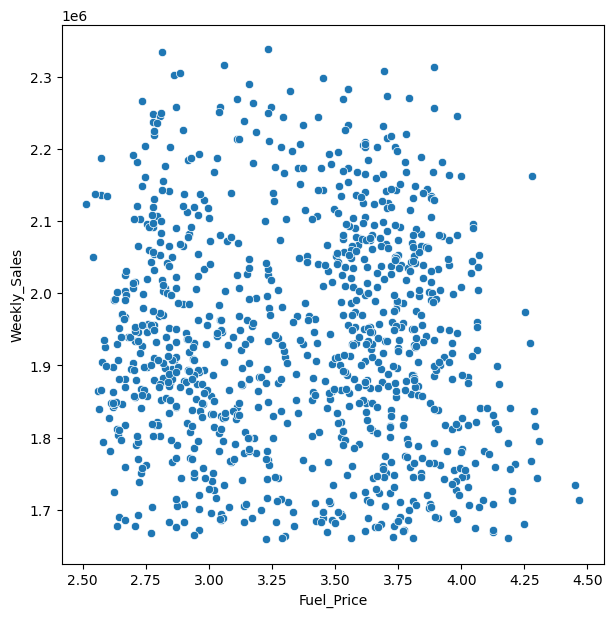

In [169]:
# ▶ Unemployment와 주간 판매량 간의 산점도(Scatter plot)
sns.scatterplot(x='Fuel_Price', y='Weekly_Sales', data=cluster4_df);
plt.gcf().set_size_inches(7, 7)

K-means 클러스터링은 아마도 좋은 방법이 아닐것 같다...

## **🔉Process03**  
**┗ 각 스토어별 ML 활용 구매량 예측**  
------------

### · 모델링을 위한 데이터 준비
---
* 모델링을 수행하기 위해 Feature와 예측하고자하는 값인 Y로 데이터를 나눔
* 학습과 예측을 위한 Train / Test set 분할

In [216]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Cluster,Dayofweek,month
606,5,2010-01-10,283178.12,0,21.72,2.60,212.23,6.77,3,6,1
2036,15,2010-01-10,566945.95,0,15.38,2.84,132.76,8.07,3,6,1
5897,42,2010-01-10,481523.93,0,30.01,3.00,126.23,9.00,3,6,1
4610,33,2010-01-10,224294.39,0,33.03,3.00,126.23,9.27,3,6,1
5039,36,2010-01-10,422169.47,0,23.70,2.57,210.44,8.48,3,6,1
...,...,...,...,...,...,...,...,...,...,...,...
5860,41,2012-12-10,1409544.97,0,4.10,3.76,199.05,6.20,2,0,12
2285,16,2012-12-10,491817.19,0,6.26,3.76,199.05,5.85,3,0,12
1427,10,2012-12-10,1713889.11,0,24.46,4.47,131.11,6.94,4,0,12
3572,25,2012-12-10,697317.41,0,6.52,4.00,216.12,7.29,3,0,12


In [55]:
# ▶ 날짜 데이터에서 월과 요일을 추출하여 새롤운 파생 변수로 활용
df12['Dayofweek'] = df12['Date'].dt.dayofweek
df12['month'] = df12['Date'].dt.month
df12.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Dayofweek,month
1607,12,2010-01-10,850936.26,0,29.56,3.00,126.23,14.31,6,1
1581,12,2010-02-04,1011822.30,0,15.47,3.09,126.60,14.10,3,2
1594,12,2010-02-07,951957.31,0,33.32,3.10,126.14,14.18,6,2
1575,12,2010-02-19,1095421.65,0,12.68,2.92,126.53,13.97,4,2
1576,12,2010-02-26,1048617.17,0,10.13,2.83,126.55,13.97,4,2


In [56]:
# ▶ 날짜 데이터에서 월과 요일을 추출하여 새롤운 파생 변수로 활용
df12['Dayofweek'] = df12['Date'].dt.dayofweek
df12['month'] = df12['Date'].dt.month
df12.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Dayofweek,month
1607,12,2010-01-10,850936.26,0,29.56,3.00,126.23,14.31,6,1
1581,12,2010-02-04,1011822.30,0,15.47,3.09,126.60,14.10,3,2
1594,12,2010-02-07,951957.31,0,33.32,3.10,126.14,14.18,6,2
1575,12,2010-02-19,1095421.65,0,12.68,2.92,126.53,13.97,4,2
1576,12,2010-02-26,1048617.17,0,10.13,2.83,126.55,13.97,4,2


In [57]:
# ▶ 날짜 데이터에서 월과 요일을 추출하여 새롤운 파생 변수로 활용
df12['Dayofweek'] = df12['Date'].dt.dayofweek
df12['month'] = df12['Date'].dt.month
df12.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Dayofweek,month
1607,12,2010-01-10,850936.26,0,29.56,3.00,126.23,14.31,6,1
1581,12,2010-02-04,1011822.30,0,15.47,3.09,126.60,14.10,3,2
1594,12,2010-02-07,951957.31,0,33.32,3.10,126.14,14.18,6,2
1575,12,2010-02-19,1095421.65,0,12.68,2.92,126.53,13.97,4,2
1576,12,2010-02-26,1048617.17,0,10.13,2.83,126.55,13.97,4,2


In [58]:
# ▶ 날짜 데이터에서 월과 요일을 추출하여 새롤운 파생 변수로 활용
df12['Dayofweek'] = df12['Date'].dt.dayofweek
df12['month'] = df12['Date'].dt.month
df12.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Dayofweek,month
1607,12,2010-01-10,850936.26,0,29.56,3.00,126.23,14.31,6,1
1581,12,2010-02-04,1011822.30,0,15.47,3.09,126.60,14.10,3,2
1594,12,2010-02-07,951957.31,0,33.32,3.10,126.14,14.18,6,2
1575,12,2010-02-19,1095421.65,0,12.68,2.92,126.53,13.97,4,2
1576,12,2010-02-26,1048617.17,0,10.13,2.83,126.55,13.97,4,2


In [59]:
# ▶ 날짜 데이터에서 월과 요일을 추출하여 새롤운 파생 변수로 활용
df12['Dayofweek'] = df12['Date'].dt.dayofweek
df12['month'] = df12['Date'].dt.month
df12.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Dayofweek,month
1607,12,2010-01-10,850936.26,0,29.56,3.00,126.23,14.31,6,1
1581,12,2010-02-04,1011822.30,0,15.47,3.09,126.60,14.10,3,2
1594,12,2010-02-07,951957.31,0,33.32,3.10,126.14,14.18,6,2
1575,12,2010-02-19,1095421.65,0,12.68,2.92,126.53,13.97,4,2
1576,12,2010-02-26,1048617.17,0,10.13,2.83,126.55,13.97,4,2


In [234]:
len(df2)

143

In [68]:
# ▶ 모델링을 학습하기 위한 Fearue(X)와 Y데이터를 구분하는 단계
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

X=df12.drop(['Store', 'Date', 'Weekly_Sales', 'CPI'], axis=1)
Y=df12['Weekly_Sales']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=1239)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(85, 6)
(85,)
(58, 6)
(58,)


### · 모델 학습 및 평가
---
* 모델을 학습하고 예측을 수행하여 성능을 평가

In [69]:
rfr = RandomForestRegressor(n_estimators=500, max_depth=4, random_state=1239)
rfr.fit(x_train, y_train)

RandomForestRegressor(max_depth=4, n_estimators=500, random_state=1239)

In [70]:
# ▶ 예측
# ▶ 예측은 학습에 사용된 Data와 Test Data 모두 예측하고 평가함(※ 과적합 여부 판별)
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score
y_pred_train = rfr.predict(x_train)
y_pred_test = rfr.predict(x_test)


mae_train = mean_absolute_error(y_train, y_pred_train)
print('mae_train(mae): ', mae_train)
r2_train = r2_score(y_train, y_pred_train)
print('r2_score(r2): ', r2_train)
print('')
mae_test = mean_absolute_error(y_test, y_pred_test)
print('mae_test(mae): ', mae_test)
r2_test = r2_score(y_test, y_pred_test)
print('r2_score(r2): ', r2_test)

mae_train(mae):  38816.280765196316
r2_score(r2):  0.7993575853848134

mae_test(mae):  68422.69232174479
r2_score(r2):  0.3610517814267228


In [71]:
# ▶ 다항회귀, 성능이 좋진 않음
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


poly = PolynomialFeatures(degree=2, include_bias=True)

X_train_poly = poly.fit_transform(x_train)

lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, y_train)

X_test_poly = poly.transform(x_test)

y_pred_test = lin_reg.predict(X_test_poly)


mae_test = mean_absolute_error(y_test, y_pred_test)
print('mae_test(mae): ', mae_test)

r2_test = r2_score(y_test, y_pred_test)
print('r2_score(r2): ', r2_test)

mae_test(mae):  165420.52725405255
r2_score(r2):  -6.515623090564065


In [72]:
# ▶ e10, 표현을 숫자로 변경
pd.options.display.float_format = '{:.2f}'.format

result = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred_test})
result['diff'] = result['Real Values'] - result['Predicted Values']
result.head(5)

,Real Values,Predicted Values,diff
1713,934917.47,1017371.60,-82454.13
1578,985594.23,1018607.56,-33013.33
1602,1004516.46,940061.53,64454.93
1593,958007.69,966320.02,-8312.33
1650,890547.07,934727.92,-44180.85


In [73]:
# 예측 오차 계산
prediction_errors = result['Real Values'] - result['Predicted Values']

# 예측 오차의 절대값 계산
absolute_errors = np.abs(prediction_errors)

# 예측률 계산
prediction_accuracy = 1 - (np.sum(absolute_errors) / np.sum(result['Real Values']))

print("예측률:", prediction_accuracy)

예측률: 0.8361794133154207


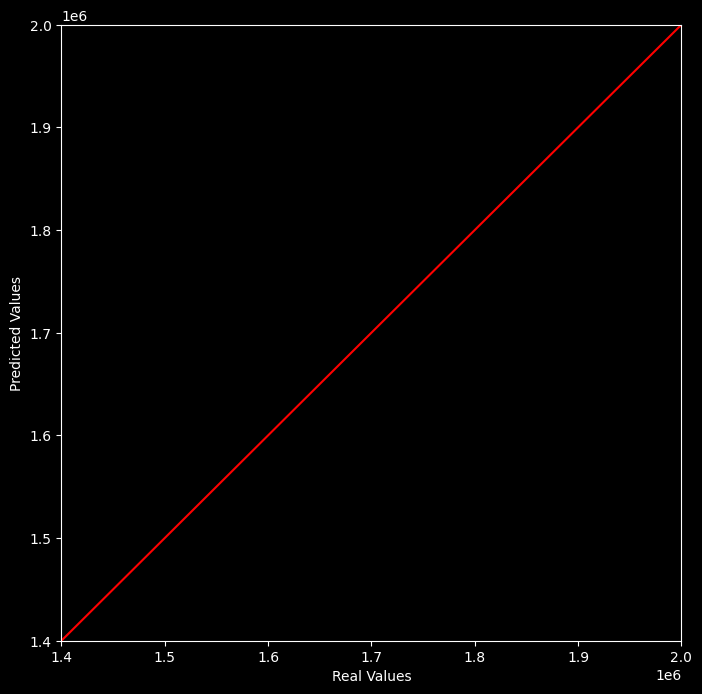

In [74]:
import matplotlib.pyplot as plt

import seaborn as sns

# ▶ xlim과 ylim을 조정해서 선형 Fitting이 잘 되는지를 확인
sns.scatterplot(x = result['Real Values'], y = result['Predicted Values'])
plt.xlim(1400000, 2000000)
plt.ylim(1400000, 2000000)

x = [1400000, 2000000]
y = [1400000, 2000000]
plt.plot(x, y, color='red')

plt.gcf().set_size_inches(8 ,8)

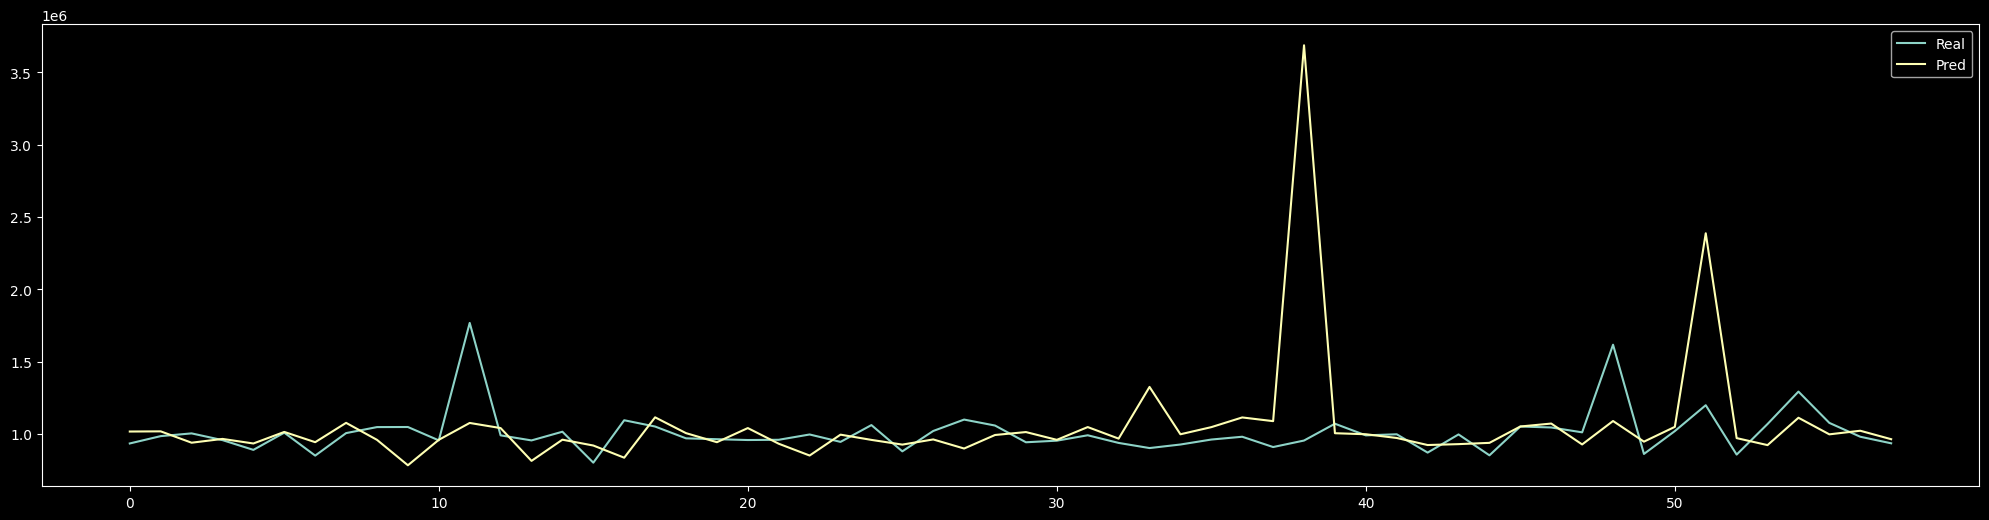

In [75]:
# ▶ 실제값과 예측값 Plotting, peak를 맞추지 못함
result = result.reset_index(drop=True)

plt.plot(result.index, result['Real Values'], label='Real');
plt.plot(result.index, result['Predicted Values'], label='Pred');
plt.legend()
plt.gcf().set_size_inches(25, 6)


### · 중요 변수 파악
---
* Feature IMP 분석을 통한 중요변수 파악

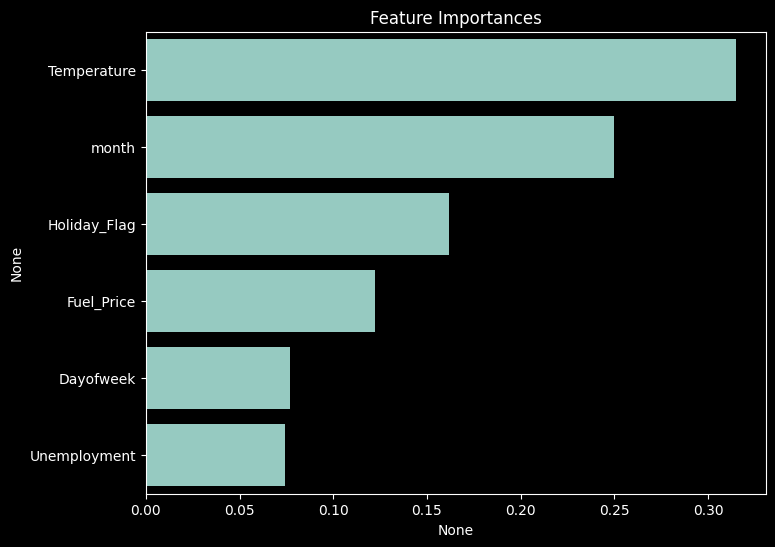

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])

ftr_importances_values = rfr.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

In [41]:
df5.groupby('Holiday_Flag')['Weekly_Sales'].mean().sort_values(ascending=False)

Holiday_Flag
1   359501.61
0   314892.28
Name: Weekly_Sales, dtype: float64

In [77]:
correlation = df12['Temperature'].corr(df12['Weekly_Sales'])

print("상관 계수:", correlation)

상관 계수: -0.37941565849924186


In [48]:
import pandas as pd

# df5에서 'Holiday_Flag'와 'Weekly_Sales' 열의 상관 계수와 p-value 계산
correlation_matrix = df5[['Holiday_Flag', 'Weekly_Sales']].corr()

print("상관 계수:")
print(correlation_matrix)

# 'Holiday_Flag'와 'Weekly_Sales' 사이의 피어슨 상관 계수
pearson_correlation = correlation_matrix.loc['Holiday_Flag', 'Weekly_Sales']
print("피어슨 상관 계수:", pearson_correlation)


상관 계수:
              Holiday_Flag  Weekly_Sales
Holiday_Flag          1.00          0.30
Weekly_Sales          0.30          1.00
피어슨 상관 계수: 0.302524704176112


In [335]:
Fuel_Price_importances = cluster3_df.groupby('Fuel_Price')['Weekly_Sales'].mean().sort_values(ascending=False)
Fuel_Price_importances

Fuel_Price
3.95   696421.72
4.07   695396.19
2.90   694531.72
3.98   693780.42
3.01   693192.50
          ...   
2.78   269624.20
2.85   268708.43
2.65   267956.30
2.95   267065.35
2.81   264214.12
Name: Weekly_Sales, Length: 793, dtype: float64

### · 모델 Save and Read
---
* 최종 모델을 저장 및 다시 불러오기

In [257]:
import pickle
# 모델 저장
saved_model = pickle.dumps(rfr)

# 모델 Read
rfr_from_pickle = pickle.loads(saved_model)

In [258]:
import pickle

# 모델을 pickle 파일로 저장
with open('/content/drive/MyDrive/파이썬 데이터분석/개인 프로젝트/마트 수요 예측/saved_model.pickle', 'wb') as f:
    pickle.dump(rfr, f)